###I used this link to verify the id of sunglass in imagenet dataset
https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
import cv2

Using TensorFlow backend.


In [0]:
model = VGG16(weights="imagenet")

W0701 20:15:55.571127 140307022604160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 20:15:55.593493 140307022604160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 20:15:55.598659 140307022604160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 20:15:55.629680 140307022604160 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0701 20:15:57.208796 140307022604160 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

##Tried with a random image of Panda

In [0]:
from skimage import io
from PIL import Image
panda= io.imread("https://www.motherjones.com/wp-content/uploads/2018/06/panda-research-6-27-18-2.jpg")

In [0]:
panda = cv2.resize(panda, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(panda)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")
last_conv_layer1 = model.get_layer("block5_conv2")
last_conv_layer2 = model.get_layer("block5_conv1")
last_conv_layer3 = model.get_layer("block4_conv3")
last_conv_layer4 = model.get_layer("block4_conv2")
last_conv_layer5 = model.get_layer("block4_conv1")

388


In [0]:
import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
grads1 = K.gradients(class_output, last_conv_layer1.output)[0]
grads2 = K.gradients(class_output, last_conv_layer2.output)[0]
grads3 = K.gradients(class_output, last_conv_layer3.output)[0]
grads4 = K.gradients(class_output, last_conv_layer4.output)[0]
grads5 = K.gradients(class_output, last_conv_layer5.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
pooled_grads1 = K.mean(grads1, axis=(0, 1, 2))
pooled_grads2 = K.mean(grads2, axis=(0, 1, 2))
pooled_grads3 = K.mean(grads3, axis=(0, 1, 2))
pooled_grads4 = K.mean(grads4, axis=(0, 1, 2))
pooled_grads5 = K.mean(grads5, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
iterate1 = K.function([model.input], [pooled_grads1, last_conv_layer1.output[0]])
iterate2 = K.function([model.input], [pooled_grads2, last_conv_layer2.output[0]])
iterate3 = K.function([model.input], [pooled_grads3, last_conv_layer3.output[0]])
iterate4 = K.function([model.input], [pooled_grads4, last_conv_layer4.output[0]])
iterate5 = K.function([model.input], [pooled_grads5, last_conv_layer5.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
pooled_grads_value1, conv_layer_output_value1 = iterate1([x])
pooled_grads_value2, conv_layer_output_value2 = iterate2([x])
pooled_grads_value3, conv_layer_output_value3 = iterate3([x])
pooled_grads_value4, conv_layer_output_value4 = iterate4([x])
pooled_grads_value5, conv_layer_output_value5 = iterate5([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  conv_layer_output_value1[:, :, i] *= pooled_grads_value1[i]
  conv_layer_output_value2[:, :, i] *= pooled_grads_value2[i]
  conv_layer_output_value3[:, :, i] *= pooled_grads_value3[i]
  conv_layer_output_value4[:, :, i] *= pooled_grads_value4[i]
  conv_layer_output_value5[:, :, i] *= pooled_grads_value5[i]

(?, 14, 14, 512)
(512,)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap1 = np.mean(conv_layer_output_value1, axis = -1)
heatmap2 = np.mean(conv_layer_output_value2, axis = -1)
heatmap3 = np.mean(conv_layer_output_value3, axis = -1)
heatmap4 = np.mean(conv_layer_output_value4, axis = -1)
heatmap5 = np.mean(conv_layer_output_value5, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap1 = np.maximum(heatmap1, 0)
heatmap2 = np.maximum(heatmap2, 0)
heatmap3 = np.maximum(heatmap3, 0)
heatmap4 = np.maximum(heatmap4, 0)
heatmap5 = np.maximum(heatmap5, 0)
heatmap /= np.max(heatmap)
heatmap1 /= np.max(heatmap1)
heatmap2 /= np.max(heatmap2)
heatmap3 /= np.max(heatmap3)
heatmap4 /= np.max(heatmap4)
heatmap5 /= np.max(heatmap5)

(14, 14, 512)
(14, 14)


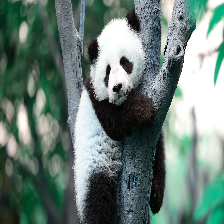

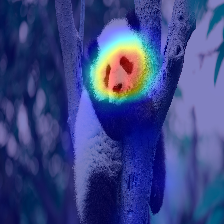

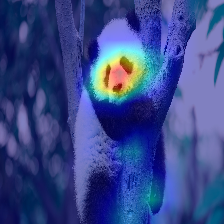

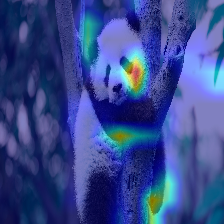

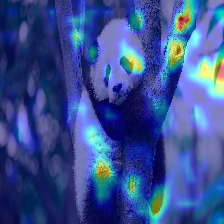

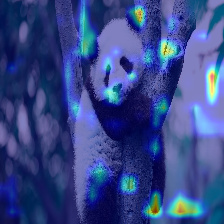

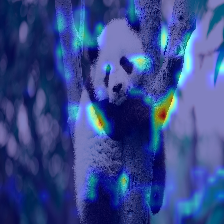

In [0]:
heatmap = cv2.resize(heatmap, (panda.shape[1],panda.shape[0]))
heatmap1 = cv2.resize(heatmap1, (panda.shape[1],panda.shape[0]))
heatmap2 = cv2.resize(heatmap2, (panda.shape[1],panda.shape[0]))
heatmap3 = cv2.resize(heatmap3, (panda.shape[1],panda.shape[0]))
heatmap4 = cv2.resize(heatmap4, (panda.shape[1],panda.shape[0]))
heatmap5 = cv2.resize(heatmap5, (panda.shape[1],panda.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap1 = np.uint8(255 * heatmap1)
heatmap2 = np.uint8(255 * heatmap2)
heatmap3 = np.uint8(255 * heatmap3)
heatmap4 = np.uint8(255 * heatmap4)
heatmap5 = np.uint8(255 * heatmap5)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
heatmap1 = cv2.applyColorMap(heatmap1, cv2.COLORMAP_JET)
heatmap2 = cv2.applyColorMap(heatmap2, cv2.COLORMAP_JET)
heatmap3 = cv2.applyColorMap(heatmap3, cv2.COLORMAP_JET)
heatmap4 = cv2.applyColorMap(heatmap4, cv2.COLORMAP_JET)
heatmap5 = cv2.applyColorMap(heatmap5, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(panda, 0.5, heatmap, 0.5, 0)
superimposed_img1 = cv2.addWeighted(panda, 0.5, heatmap1, 0.5, 0)
superimposed_img2 = cv2.addWeighted(panda, 0.5, heatmap2, 0.5, 0)
superimposed_img3 = cv2.addWeighted(panda, 0.5, heatmap3, 0.5, 0)
superimposed_img4 = cv2.addWeighted(panda, 0.5, heatmap4, 0.5, 0)
superimposed_img5 = cv2.addWeighted(panda, 0.5, heatmap5, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(panda)
cv2_imshow(superimposed_img)
cv2_imshow(superimposed_img1)
cv2_imshow(superimposed_img2)
cv2_imshow(superimposed_img3)
cv2_imshow(superimposed_img4)
cv2_imshow(superimposed_img5)

##For tony_stark image 

In [0]:
from skimage import io
from PIL import Image
man = io.imread("https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg")
#man = Image.open('https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg')

In [0]:
man = cv2.resize(man, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(man)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv3")

837


In [0]:
import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

(?, 14, 14, 512)
(512,)


In [0]:
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

(14, 14, 512)
(14, 14)


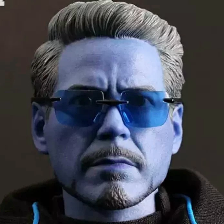

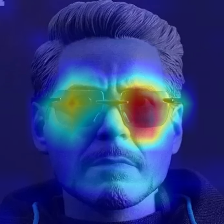

In [0]:
heatmap = cv2.resize(heatmap, (man.shape[1], man.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(man, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(man)
cv2_imshow(superimposed_img)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

837
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


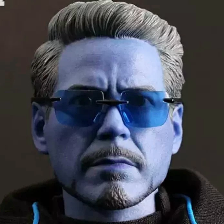

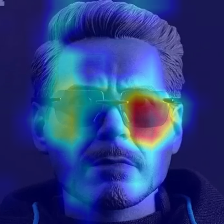

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv2")
import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (man.shape[1], man.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(man, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(man)
cv2_imshow(superimposed_img)

837
(?, 14, 14, 512)
(512,)
(14, 14, 512)
(14, 14)


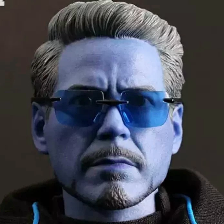

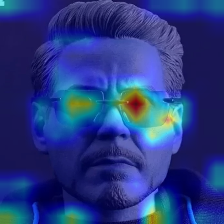

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("block5_conv1")
import keras.backend as K
grads = K.gradients(class_output, last_conv_layer.output)[0]
print(grads.shape)
pooled_grads = K.mean(grads, axis=(0, 1, 2))
print(pooled_grads.shape)
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)
print(conv_layer_output_value.shape)
print(heatmap.shape)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
heatmap = cv2.resize(heatmap, (man.shape[1], man.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(man, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow(man)
cv2_imshow(superimposed_img)

In [0]:
!pip install keract

40960/35363 [==================================] - 0s 0us/step


W0630 19:01:03.090317 140667032860544 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



hair_spray (14.472976326942444)
input_2:0 (224, 224, 3) -> Skipped. First dimension is not 1.
block1_conv1_1/Relu:0 (1, 224, 224, 64) 


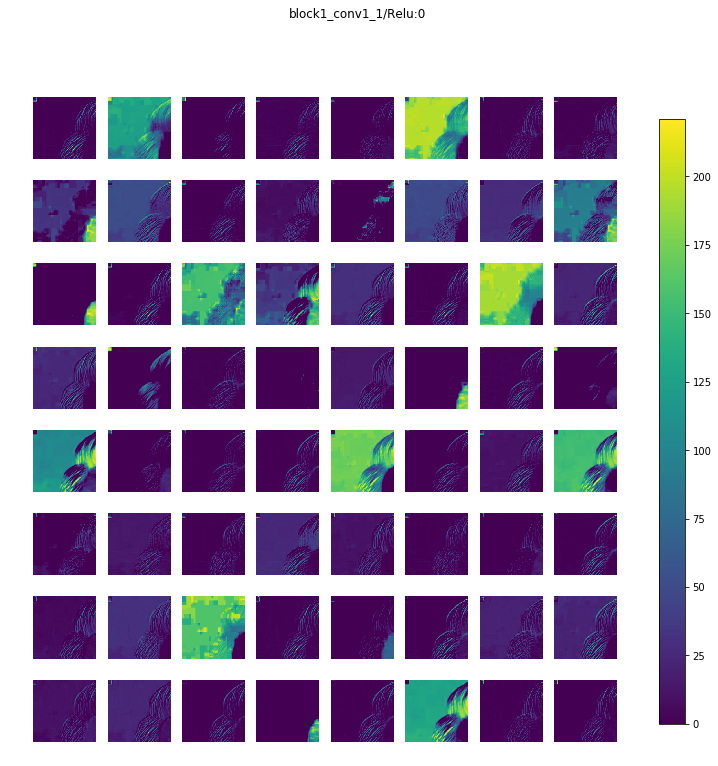

block1_conv2_1/Relu:0 (1, 224, 224, 64) 


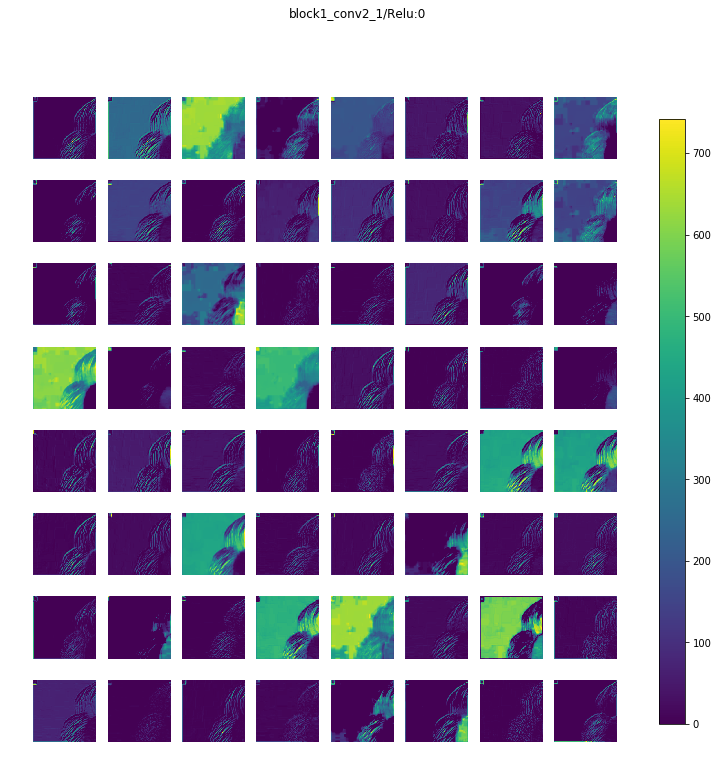

block1_pool_1/MaxPool:0 (1, 112, 112, 64) 


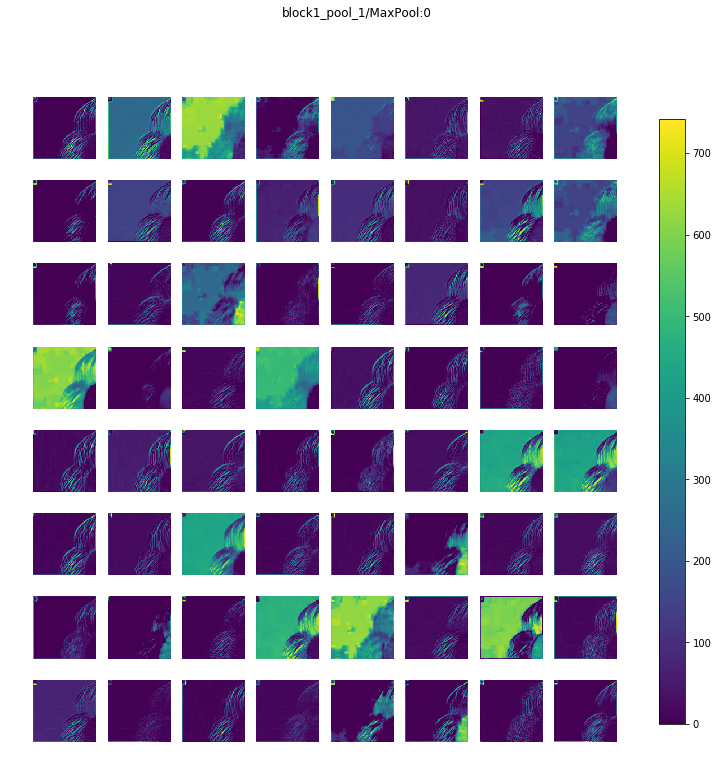

block2_conv1_1/Relu:0 (1, 112, 112, 128) 


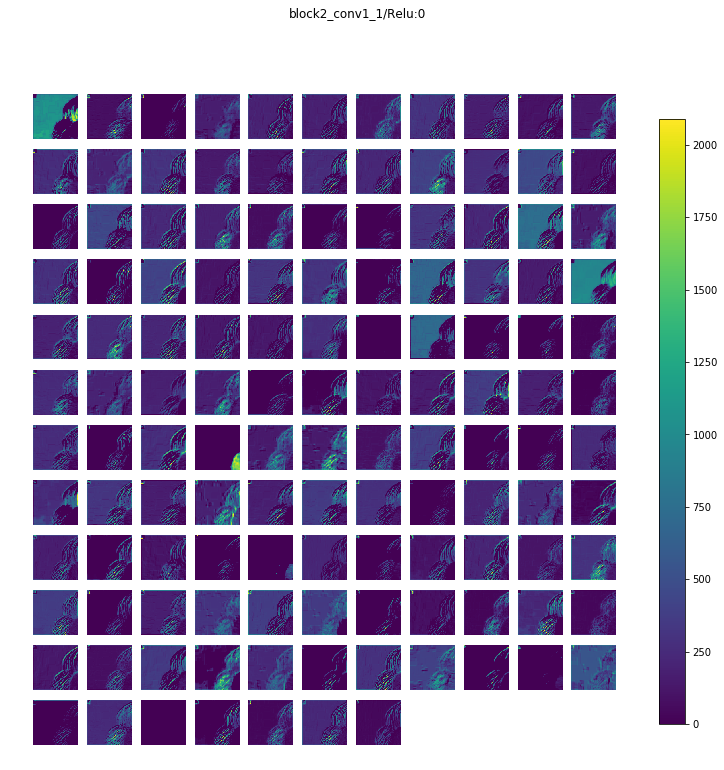

block2_conv2_1/Relu:0 (1, 112, 112, 128) 


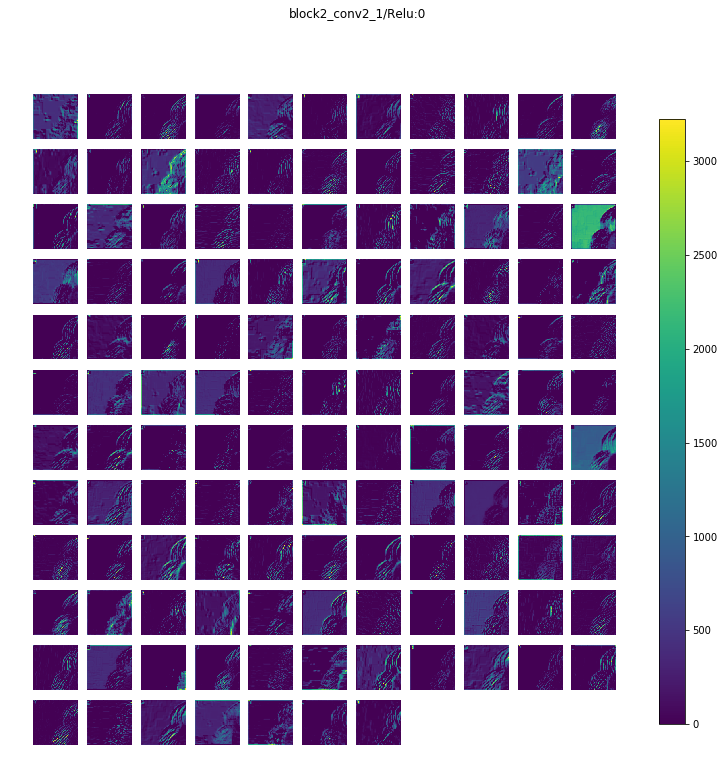

block2_pool_1/MaxPool:0 (1, 56, 56, 128) 


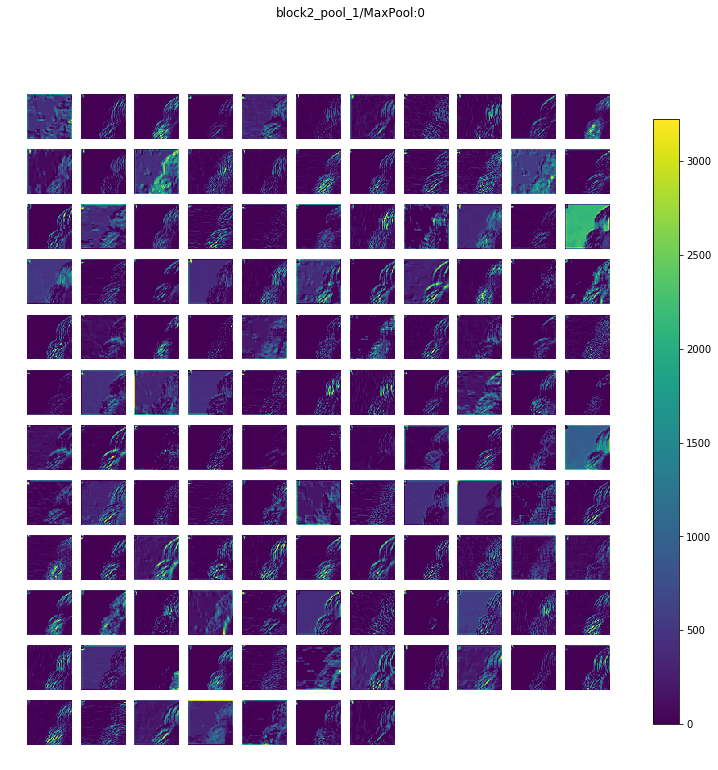

block3_conv1_1/Relu:0 (1, 56, 56, 256) 


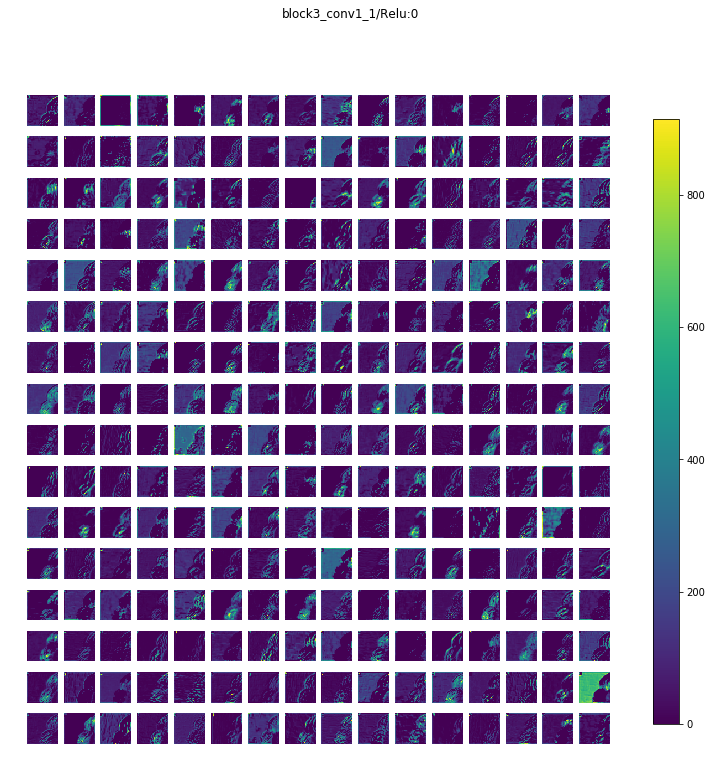

block3_conv2_1/Relu:0 (1, 56, 56, 256) 


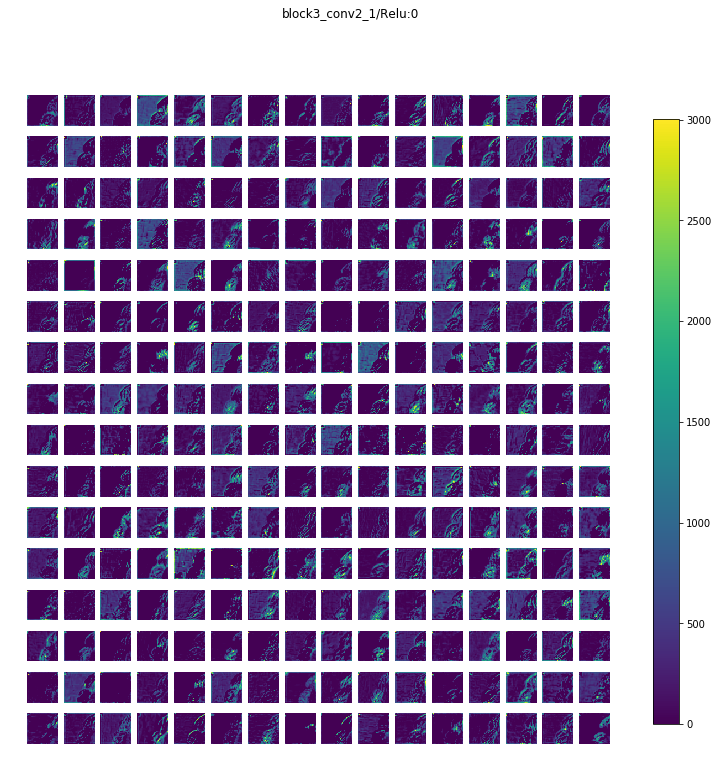

block3_conv3_1/Relu:0 (1, 56, 56, 256) 


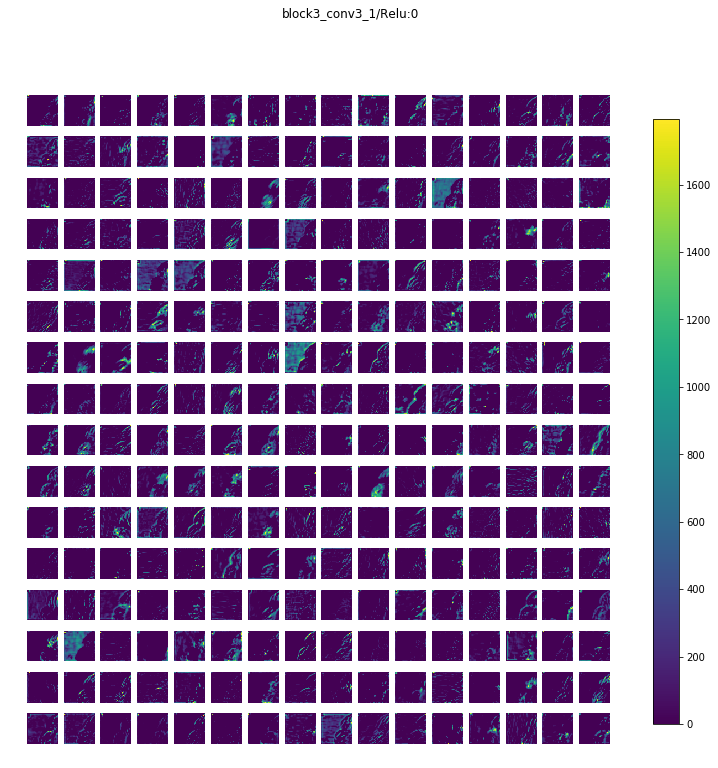

block3_pool_1/MaxPool:0 (1, 28, 28, 256) 


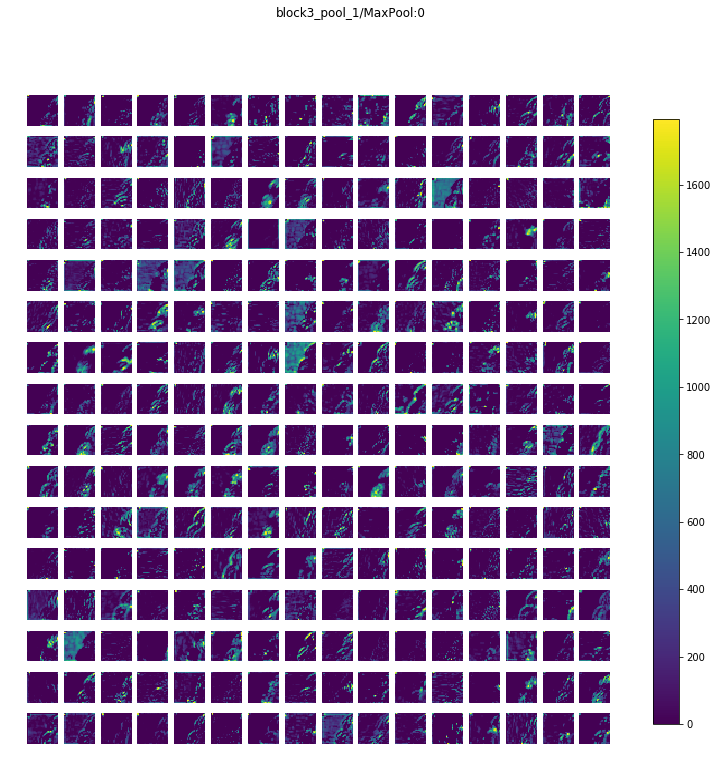

block4_conv1_1/Relu:0 (1, 28, 28, 512) 


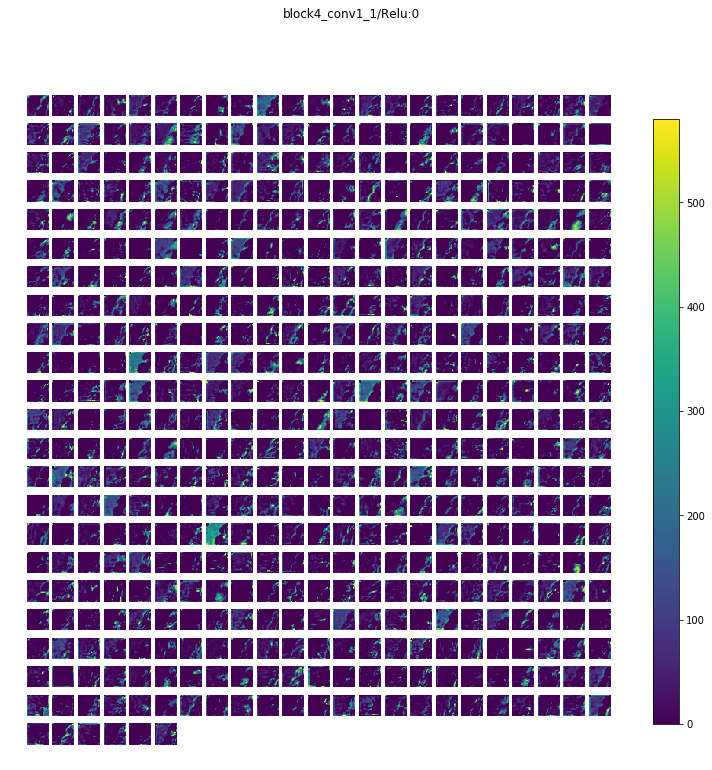

block4_conv2_1/Relu:0 (1, 28, 28, 512) 


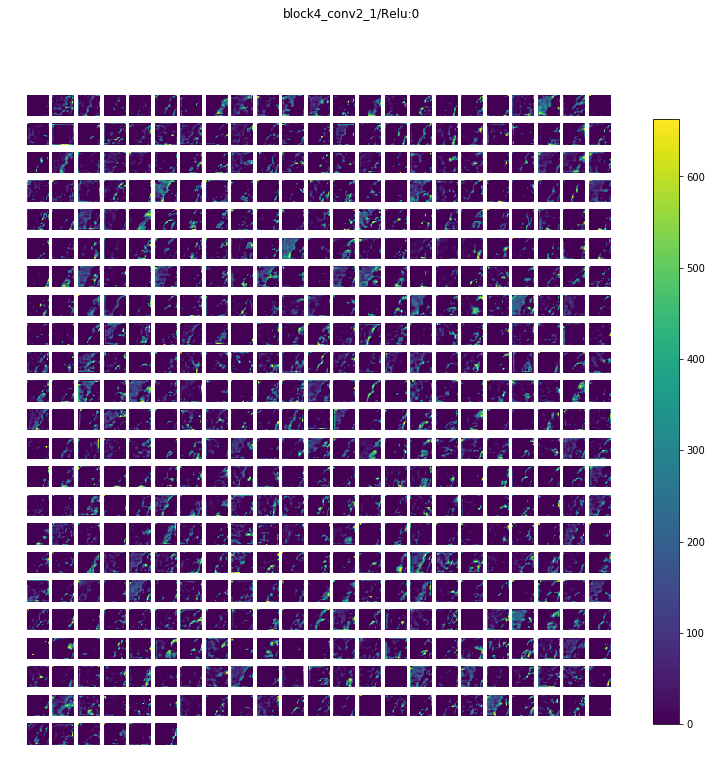

block4_conv3_1/Relu:0 (1, 28, 28, 512) 


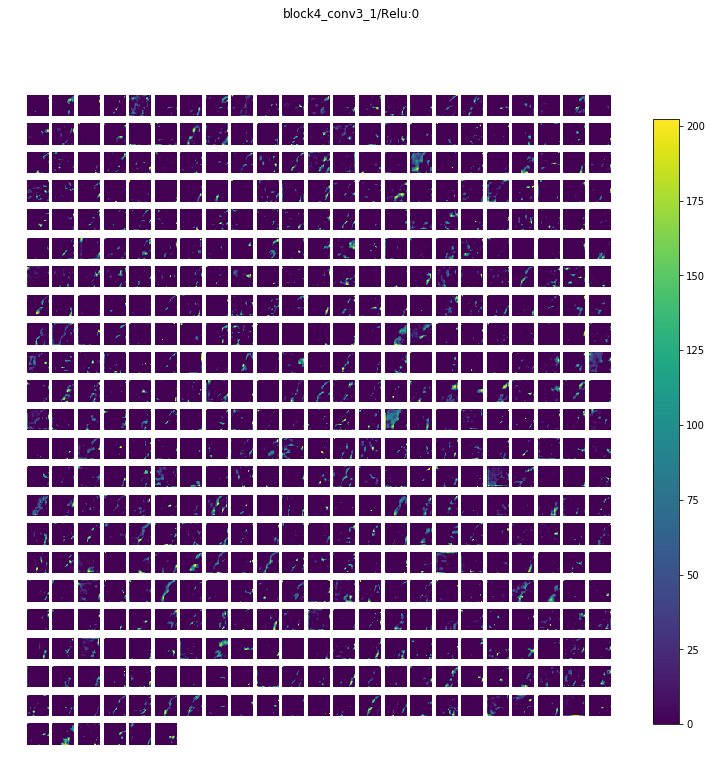

block4_pool_1/MaxPool:0 (1, 14, 14, 512) 


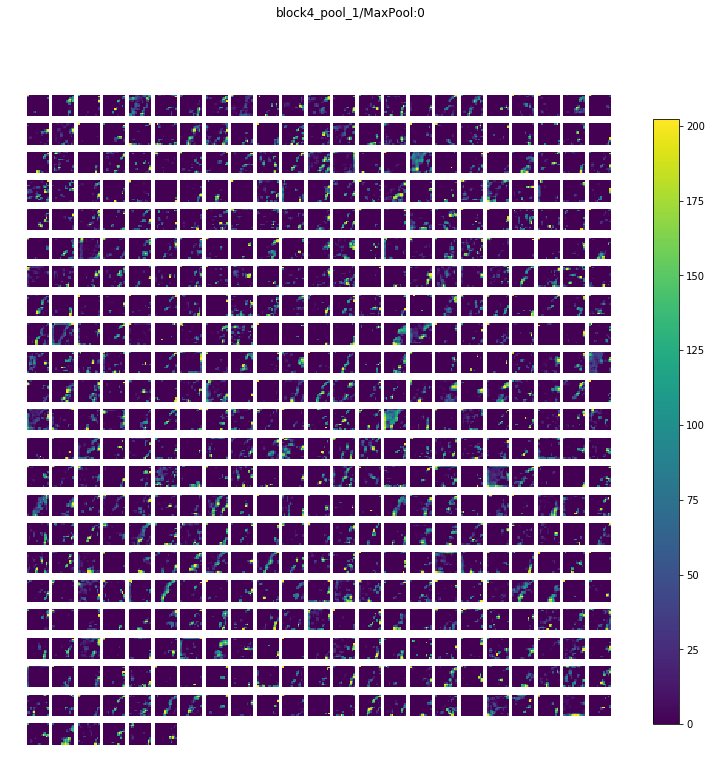

block5_conv1_1/Relu:0 (1, 14, 14, 512) 


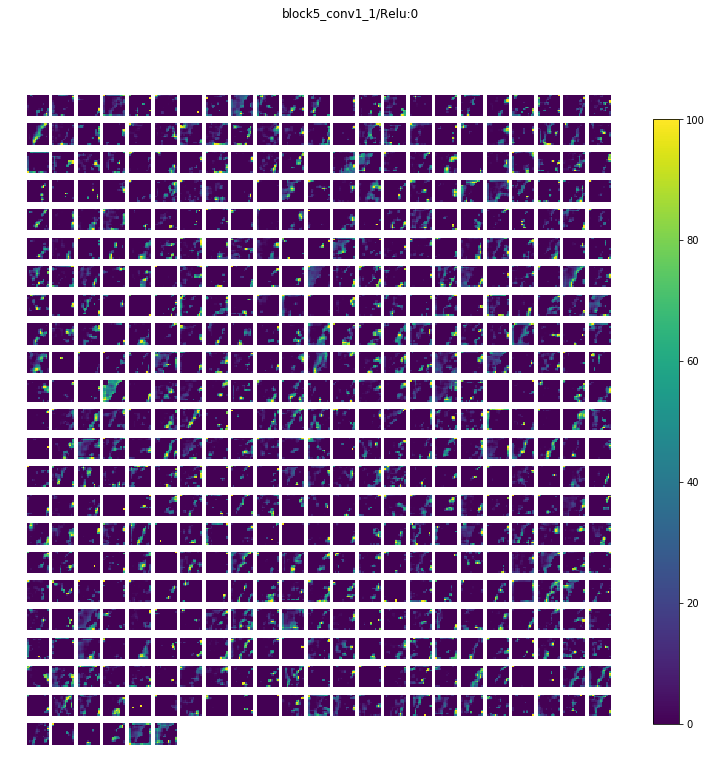

block5_conv2_1/Relu:0 (1, 14, 14, 512) 


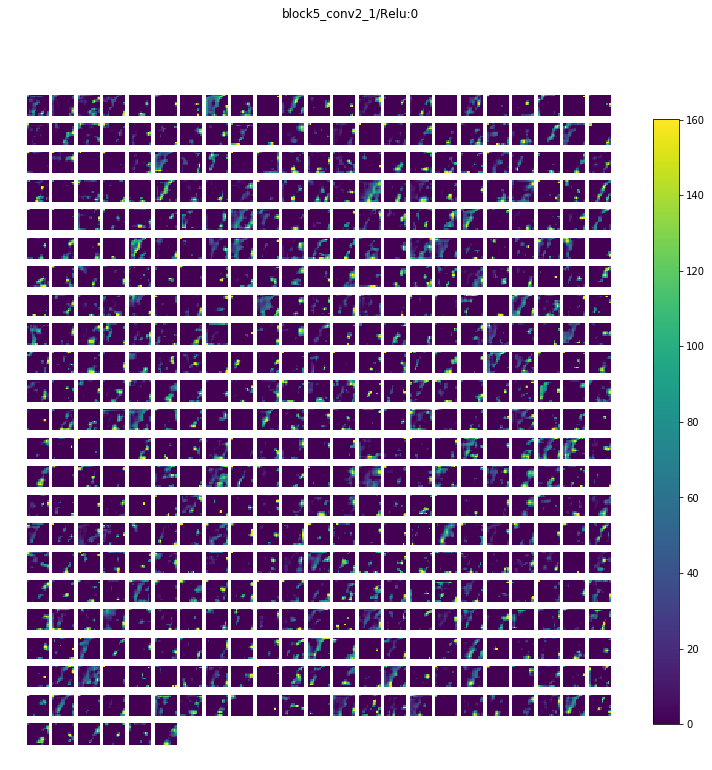

block5_conv3_1/Relu:0 (1, 14, 14, 512) 


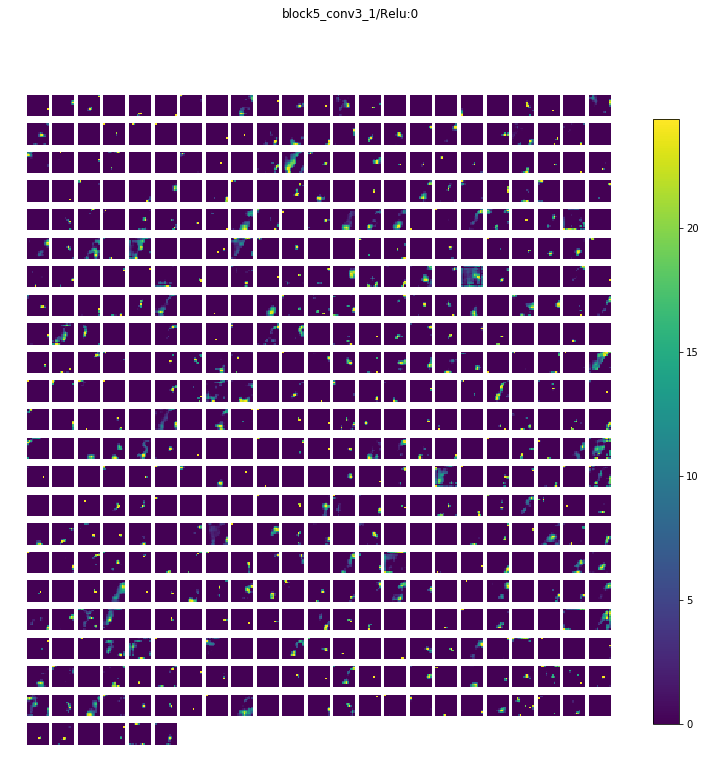

block5_pool_1/MaxPool:0 (1, 7, 7, 512) 


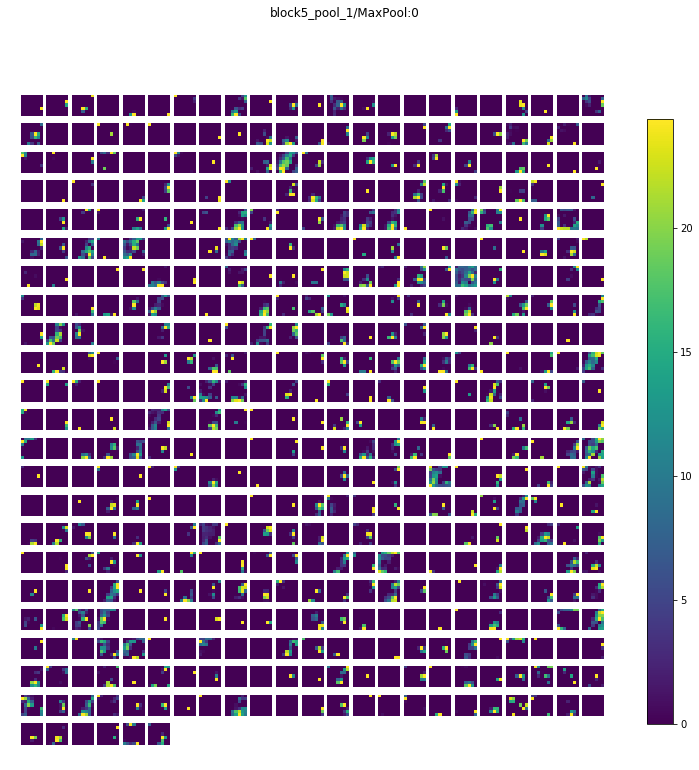

flatten_1/Reshape:0 (1, 25088) -> Skipped. 2D Activations.
fc1_1/Relu:0 (1, 4096) -> Skipped. 2D Activations.
fc2_1/Relu:0 (1, 4096) -> Skipped. 2D Activations.
predictions_1/Softmax:0 (1, 1000) -> Skipped. 2D Activations.


In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import img_to_array

model = VGG16()

from PIL import Image
import requests
from io import BytesIO

url = 'https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg'
response = requests.get(url)
image = Image.open(BytesIO(response.content))
image = image.crop((0, 0, 224, 224))
image = img_to_array(image)
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
image = preprocess_input(image)
yhat = model.predict(image)
label = decode_predictions(yhat)
label = label[0][0]
print('{} ({})'.format(label[1], label[2] * 100))

import keract

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
activations = keract.get_activations(model, image)
first = activations.get('block1_conv1/Relu:0')
keract.display_activations(activations)

##Implementing saliency maps


In [0]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from skimage import io
from PIL import Image

# Build the VGG16 network with ImageNet weights
model = VGG16(weights='imagenet', include_top=True)

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

Using TensorFlow backend.
W0701 19:25:09.366493 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0701 19:25:09.381684 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0701 19:25:09.384608 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0701 19:25:09.410540 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



553467904/553467096 [==============================] - 41s 0us/step


W0701 19:25:52.097334 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0701 19:25:52.098467 139716142724992 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


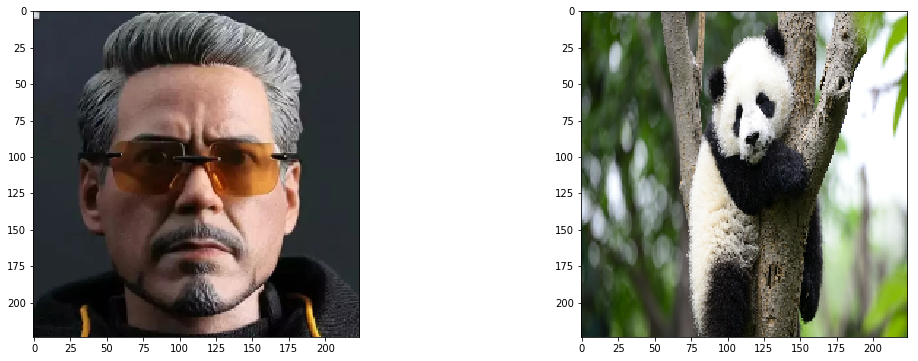

In [0]:
from vis.utils import utils
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 6)

img1 = io.imread("https://raw.githubusercontent.com/prajnaraipn7/new/master/16_scale_tony_stark_avenger3_headscrupt_with_glasses_1534759826_e79b0cf4.jpg")
img2= io.imread("https://www.motherjones.com/wp-content/uploads/2018/06/panda-research-6-27-18-2.jpg")
img1=cv2.resize(img1,(224,224))
img2=cv2.resize(img2,(224,224))
#img1 = utils.load_img('images/ouzel1.jpg', target_size=(224, 224))
#img2 = utils.load_img('images/ouzel2.jpg', target_size=(224, 224))

f, ax = plt.subplots(1, 2)
ax[0].imshow(img1)
ax[1].imshow(img2)

In [0]:
pip install git+git://github.com/raghakot/keras-vis.git --upgrade --no-deps

  Cloning git://github.com/raghakot/keras-vis.git to /tmp/pip-req-build-h04gd4y0
  Running command git clone -q git://github.com/raghakot/keras-vis.git /tmp/pip-req-build-h04gd4y0
  Stored in directory: /tmp/pip-ephem-wheel-cache-1m4s5peu/wheels/ff/01/8e/3a66d951f9b53f9894a010107b05253fb9a6c6f2555a5aaeca
Successfully built keras-vis
  Found existing installation: keras-vis 0.4.1
    Uninstalling keras-vis-0.4.1:
      Successfully uninstalled keras-vis-0.4.1


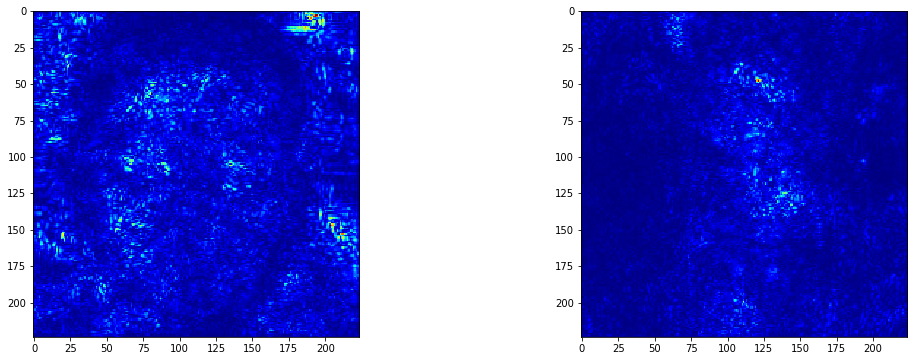

In [0]:
from vis.visualization import visualize_saliency, overlay
from vis.utils import utils
from keras import activations

# Utility to search for layer index by name. 
# Alternatively we can specify this as -1 since it corresponds to the last layer.
layer_idx = utils.find_layer_idx(model, 'predictions')

f, ax = plt.subplots(1, 2)
for i, img in enumerate([img1, img2]):    
    # 20 is the imagenet index corresponding to `ouzel`
    grads = visualize_saliency(model, layer_idx, filter_indices=20, seed_input=img)
    
    # visualize grads as heatmap
    ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

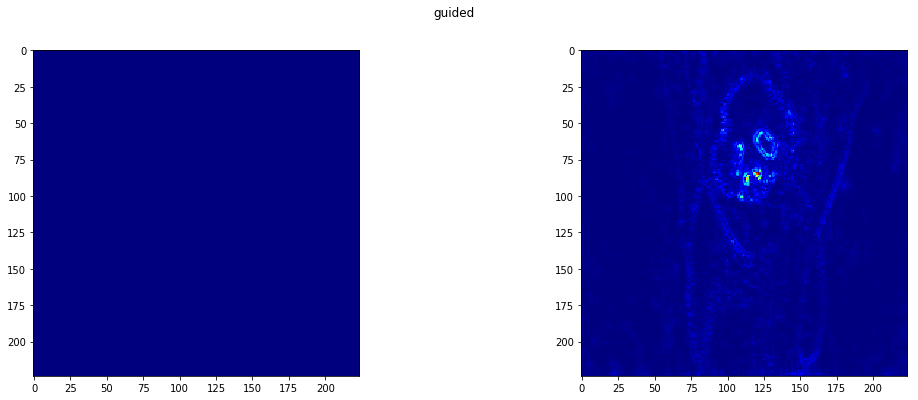

<Figure size 1296x432 with 0 Axes>

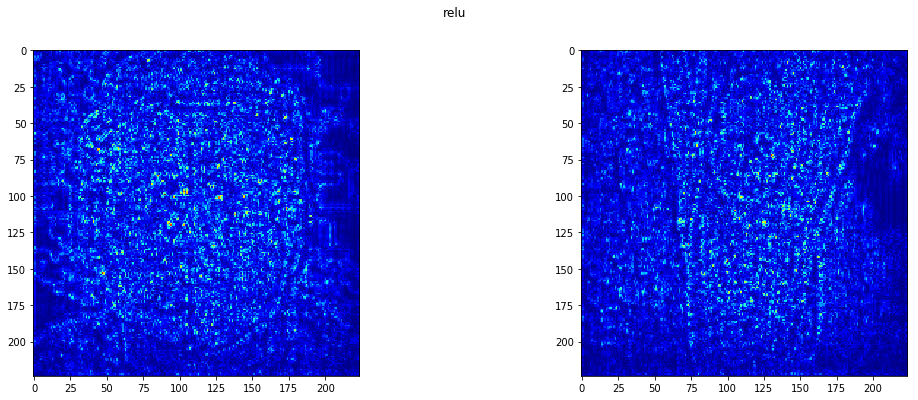

In [0]:
for modifier in ['guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle(modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_saliency(model, layer_idx, filter_indices=20, 
                                   seed_input=img, backprop_modifier=modifier)
        # Lets overlay the heatmap onto original image.    
        ax[i].imshow(grads, cmap='jet')

<Figure size 1296x432 with 0 Axes>

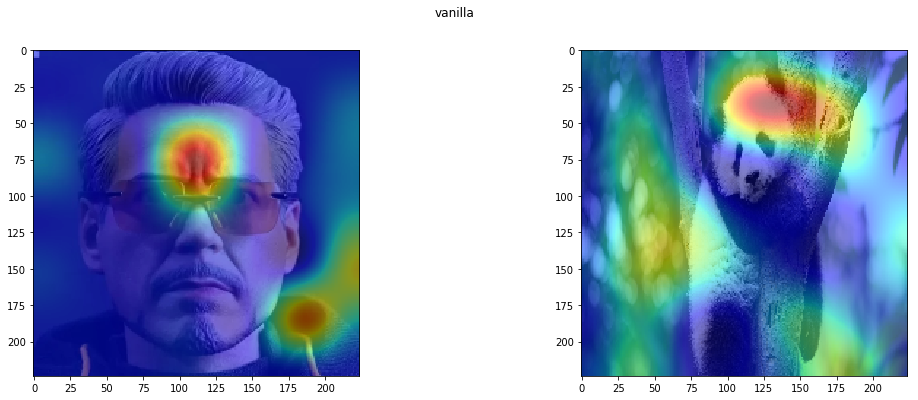

<Figure size 1296x432 with 0 Axes>

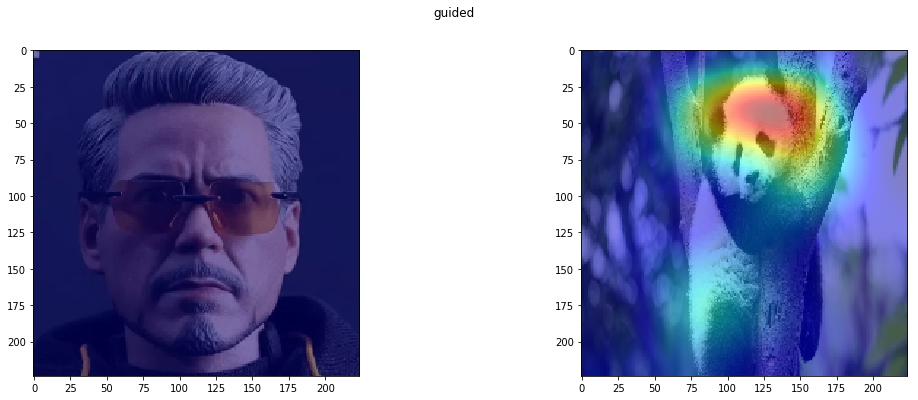

<Figure size 1296x432 with 0 Axes>

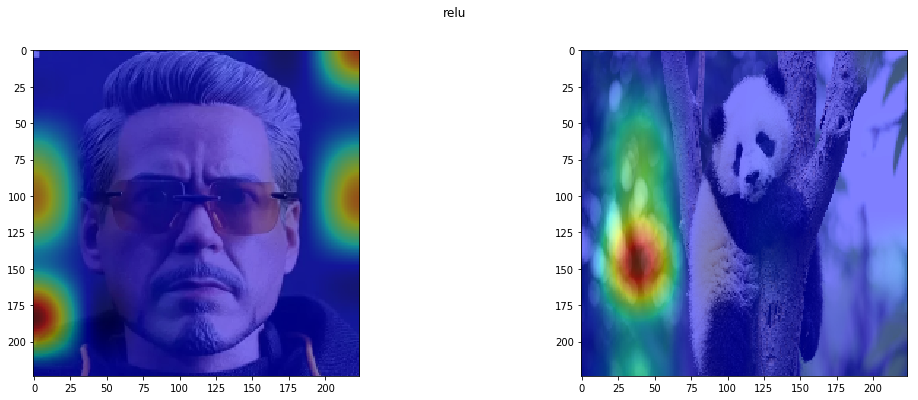

In [0]:
import numpy as np
import matplotlib.cm as cm
from vis.visualization import visualize_cam

for modifier in [None, 'guided', 'relu']:
    plt.figure()
    f, ax = plt.subplots(1, 2)
    plt.suptitle("vanilla" if modifier is None else modifier)
    for i, img in enumerate([img1, img2]):    
        # 20 is the imagenet index corresponding to `ouzel`
        grads = visualize_cam(model, layer_idx, filter_indices=20, 
                              seed_input=img, backprop_modifier=modifier)        
        # Lets overlay the heatmap onto original image.    
        jet_heatmap = np.uint8(cm.jet(grads)[..., :3] * 255)
        ax[i].imshow(overlay(jet_heatmap, img))